In [9]:
import os
from IPython.display import clear_output
import pickle
data_path = './raw_data_features/RDK7.csv'
activity_col = 'pChEMBL Value'
task_type = 'C'
target_thresh = 7
var_thresh = 0.05
scoring = 'f1'




# Create directory for raw result
SAVE_PREFIX = os.getcwd()+"/utility/"

if os.path.isdir(SAVE_PREFIX) == False:
    os.mkdir(SAVE_PREFIX)
else:
    pass

def savefile(fname, lst, save_dir):
    with open(save_dir + fname, "w") as f:
        f.write(str(list(lst)))

In [10]:
import os
import sys
import pandas as pd
sys.path.append('qsar')
from Data_integration import Data_Integration
from Data_preprocess import Data_preprocess
from Outliers_handling import Univariate_Outliers, Mutivariate_Outliers
from Rescale import rescale
from Feature_selection import feature_selection_pipeline
from Feature_engineering import feature_engineering
from Model_selection import model_selection
from Meta_analysis import statistic_data, statistic_test
from Posthoc import statical_test

# **1. Data Itegration and Partition**

In [11]:
data = pd.read_csv(data_path)
data.head()

,pChEMBL Value,Canomicalsmiles,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,9.30,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O,1,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,1,0,0
1,9.22,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,1,1,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
2,9.15,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,1,1,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
3,9.00,CC(C)n1c(=O)c(C(=O)NCc2ccc(F)cc2)c(O)c2ncccc21,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,8.74,COc1cc2c(cc1Cc1cccc(Cl)c1F)c(=O)c(C(=O)O)cn2[C...,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0


In [12]:
data.drop(['Canomicalsmiles'], axis =1, inplace = True)

Data train: (1995, 4097)
Data test: (499, 4097)
***************************************************************************


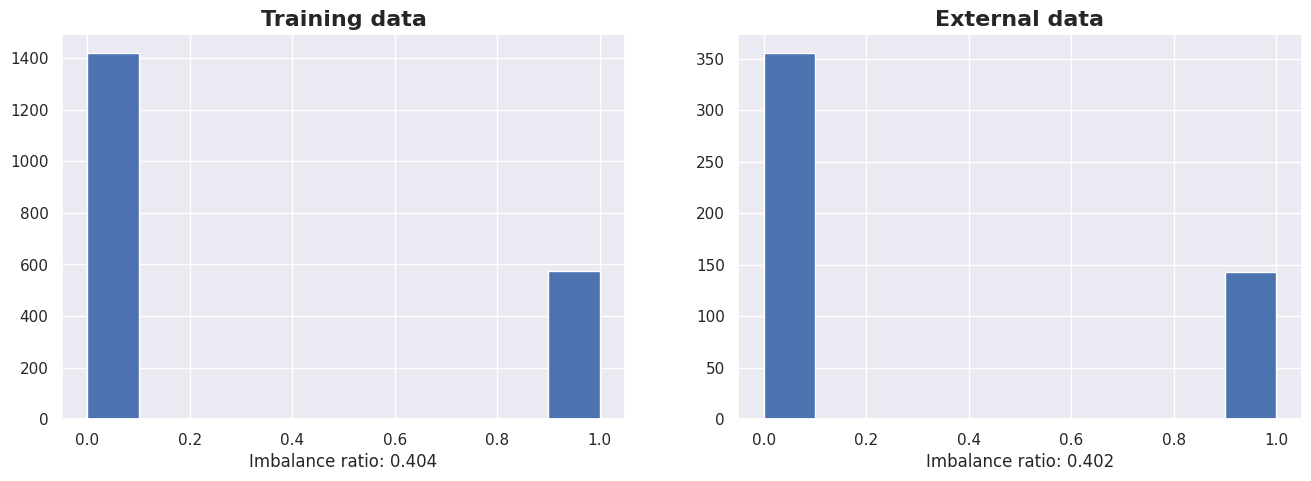

In [13]:
integration = Data_Integration(data, activity_col = activity_col, task_type= task_type, target_thresh = target_thresh)
integration.fit()
Data_train = integration.data_train
Data_test = integration.data_test

In [14]:
import warnings
warnings.filterwarnings('ignore')

# **2. Data Preprocessing**

Total duplicated rows-train: 63
Data train before drop duplicates: 1995
Data train after drop duplicates: 1932
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index(['2342'], dtype='object')
Total similar columns: 1
Data train before drop duplicates: (1932, 4097)
Data after drop duplicates: (1932, 4096)
***************************************************************************
Data test before drop duplicates: (495, 4097)
Data test after drop duplicates: (495, 4096)
***************************************************************************
Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []
Drop_cols []
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(1932, 4095) (1932,)
>Threshold=0.00, Features=4095
>Threshold=0.05, Features=4058
>Threshold=0.10, Features=3645
>Threshold=0.15, Features=2721
>Threshold=0.20, Features=1619


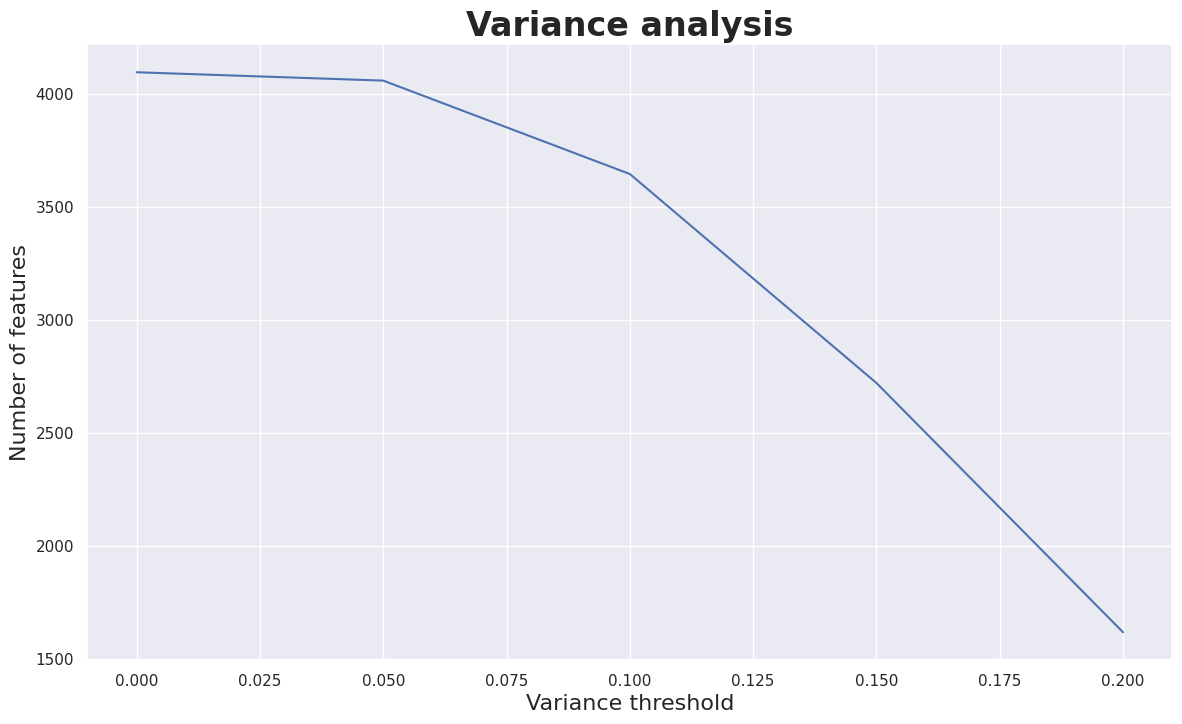

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [15]:
from Data_preprocess import Data_preprocess
preprocess = Data_preprocess(Data_train, Data_test, var_thresh = var_thresh,
                                     activity_col = activity_col)
preprocess.fit()
Data_train = preprocess.data_train
Data_test = preprocess.data_test

In [16]:
savefile("DUP_COL.txt", list(preprocess.idx), SAVE_PREFIX)  
savefile("drop_cols.txt", list(preprocess.drop_cols), SAVE_PREFIX)  
savefile("Variance_Cols.txt", list(preprocess.lst), SAVE_PREFIX)    
savefile("Nomial_Col.txt",list(preprocess.col), SAVE_PREFIX)

# **3. Outlier Handeling**

In [17]:
univariate = Univariate_Outliers(Data_train, Data_test, 
                                   activity_col= activity_col, handling_method = 'Transformation',
                                   Kbin_handling ='Y', variance_threshold = 'Y')
univariate.fit()
Data_train = univariate.data_train
Data_test = univariate.data_test
Data_train.shape

Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique


(1932, 4059)

In [18]:
mutivariate = Mutivariate_Outliers(Data_train,Data_test, 
                                           method = 'LocalOutlierFactor')
mutivariate.fit()
Data_train = mutivariate.data_train
Data_test = mutivariate.data_test

Total outlier remove by LOF: 112


# 4. Rescale

In [19]:
rescaling = rescale(Data_train,Data_test, 
                            activity_col=activity_col, scaler_method = 'MinMaxScaler')
rescaling.fit()
Data_train = rescaling.data_train
Data_test = rescaling.data_test

***************************************************************************
Scaling method: MinMaxScaler


In [20]:
while True:
    try:
        with open(SAVE_PREFIX + 'rescale.pkl','wb') as f:
            pickle.dump(rescaling.scl,f)
        break
    except:
        print("No rescale")
        break

No rescale


# **5. Feature selection**

In [21]:
# 6. Feature engineering
feature = feature_selection_pipeline(data_train=Data_train, data_test=Data_test, 
                                             activity_col=activity_col,task_type =task_type,
                                             scoring = scoring, method ='XGB')
feature.fit()
X_train = feature.X_train_new
X_test  = feature.X_test_new
y_train = feature.y_train
y_test  = feature.y_test

In [22]:
while True:
    try:
        with open(SAVE_PREFIX + 'select_transform.pkl','wb') as f:
            pickle.dump(feature.select,f)
        break
    except:
        print("No rescale")
        break

# **6. Machine learning model**

In [25]:
# Classification
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import LinearSVC, SVC

# Regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from sklearn.svm import LinearSVR, SVR

# imb
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import  CondensedNearestNeighbour
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

In [26]:
model = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='mlogloss',
                     max_depth = 5, learning_rate = 0.13853526499953608, n_estimators = 54,
                      min_child_weight = 1, gama = 0.0016145215090081605, subsample = 0.8893106963312789,
                      colsample_bytree = 0.6351067897414812,
                      reg_alpha = 3.3173836339552476e-07,
                      reg_lambda = 5.833565947119527e-06
                     )
sampling = SMOTE(random_state=42,sampling_strategy =0.6080363095456893)
steps = [('s', sampling),('m', model)]
pipeline = Pipeline(steps = steps)
pipeline.fit(X_train,y_train)
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores_f1 = cross_val_score(pipeline, X_train, y_train, scoring = "f1", cv=cv, n_jobs = -1)
scores_ap=cross_val_score(pipeline, X_train, y_train, scoring = "average_precision",
                        cv= cv, n_jobs = -1)
f1 = scores_f1.mean()
ap = scores_ap.mean()
print("f1 cross validation", f1)
print("ap validation", ap)
print(classification_report(y_test, pipeline.predict(X_test)))
print('AUC =', roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))
print('AP =', average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1]))
print('F1 =', f1_score(y_test, pipeline.predict(X_test)))

f1 cross validation 0.853889159593455
ap validation 0.9279525757736914
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       325
           1       0.85      0.89      0.87       139

    accuracy                           0.92       464
   macro avg       0.90      0.91      0.91       464
weighted avg       0.92      0.92      0.92       464

AUC = 0.959136690647482
AP = 0.9135144285289861
F1 = 0.8701754385964912


In [27]:
# save model for prediction
with open(SAVE_PREFIX + 'model.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [28]:
pipeline.predict(X_train[0:3])

array([0, 0, 0])